# Markov Decision Process

### State
|  |  |  |  |
|:---:|:---:|:---:|:---:|
| 0  | 1 | 2 |**3**|
| 4  | W | 5 |<span style="color:red">6</span>|
| 7  | 8 | 9 | 10|

- 3이 최종 목적지
- 6은 가서는 안되는 자리

In [1]:
import numpy as np
states = [0,1,2,3,4,5,6,7,8,9,10] 
N_STATES = len(states)

### Action
- 0: left
- 1: right
- 2: up
- 3: down

In [2]:
actions = [0, 1, 2, 3]  # left, right, up, down
N_ACTIONS = len(actions) 

### Transition Probability
- You move according to your action with 80% probability.
- Your move may have a left and rigth one click error with 10% probability each.
- If there is a barrier against your move, your move bounds back.

In [3]:
P = np.empty((N_STATES, N_ACTIONS, N_STATES))

#                0   1   2   3   4   5   6   7   8   9  10
P[ 0, 0, :] = [ .9,  0,  0,  0, .1,  0,  0,  0,  0,  0,  0 ]
P[ 0, 1, :] = [ .1, .8,  0,  0, .1,  0,  0,  0,  0,  0,  0 ]
P[ 0, 2, :] = [ .9, .1,  0,  0,  0,  0,  0,  0,  0,  0,  0 ]
P[ 0, 3, :] = [ .1, .1,  0,  0, .8,  0,  0,  0,  0,  0,  0 ]

P[ 1, 0, :] = [ .8, .2,  0,  0,  0,  0,  0,  0,  0,  0,  0 ] 
P[ 1, 1, :] = [  0, .2, .8,  0,  0,  0,  0,  0,  0,  0,  0 ]
P[ 1, 2, :] = [ .1, .8, .1,  0,  0,  0,  0,  0,  0,  0,  0 ]
P[ 1, 3, :] = [ .1, .8, .1,  0,  0,  0,  0,  0,  0,  0,  0 ]

P[ 2, 0, :] = [  0, .8, .1,  0,  0, .1,  0,  0,  0,  0,  0 ]
P[ 2, 1, :] = [  0,  0, .1, .8,  0, .1,  0,  0,  0,  0,  0 ]
P[ 2, 2, :] = [  0, .1, .8, .1,  0,  0,  0,  0,  0,  0,  0 ]
P[ 2, 3, :] = [  0, .1,  0, .1,  0, .8,  0,  0,  0,  0,  0 ]

P[ 3, 0, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0 ]
P[ 3, 1, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0 ]
P[ 3, 2, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0 ]
P[ 3, 3, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0 ]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 4, 0, :] = [ .1,  0,  0,  0, .8,  0,  0, .1,  0,  0,  0 ]
P[ 4, 1, :] = [ .1,  0,  0,  0, .8,  0,  0, .1,  0,  0,  0 ]
P[ 4, 2, :] = [ .8,  0,  0,  0, .2,  0,  0,  0,  0,  0,  0 ]
P[ 4, 3, :] = [  0,  0,  0,  0, .2,  0,  0, .8,  0,  0,  0 ]

P[ 5, 0, :] = [  0,  0, .1,  0,  0, .8,  0,  0,  0, .1,  0 ]
P[ 5, 1, :] = [  0,  0, .1,  0,  0,  0, .8,  0,  0, .1,  0 ]
P[ 5, 2, :] = [  0,  0, .8,  0,  0, .1, .1,  0,  0,  0,  0 ]
P[ 5, 3, :] = [  0,  0,  0,  0,  0, .1, .1,  0,  0, .8,  0 ]

P[ 6, 0, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0 ]
P[ 6, 1, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0 ]
P[ 6, 2, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0 ]
P[ 6, 3, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0 ]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 7, 0, :] = [  0,  0,  0,  0, .1,  0,  0, .9,  0,  0,  0 ]
P[ 7, 1, :] = [  0,  0,  0,  0, .1,  0,  0, .1, .8,  0,  0 ]
P[ 7, 2, :] = [  0,  0,  0,  0, .8,  0,  0, .1, .1,  0,  0 ]
P[ 7, 3, :] = [  0,  0,  0,  0,  0,  0,  0, .9, .1,  0,  0 ]

P[ 8, 0, :] = [  0,  0,  0,  0,  0,  0,  0, .8, .2,  0,  0 ]
P[ 8, 1, :] = [  0,  0,  0,  0,  0,  0,  0,  0, .2, .8,  0 ]
P[ 8, 2, :] = [  0,  0,  0,  0,  0,  0,  0, .1, .8, .1,  0 ]
P[ 8, 3, :] = [  0,  0,  0,  0, .0,  0,  0, .1, .8, .1,  0 ]

P[ 9, 0, :] = [  0,  0,  0,  0,  0, .1,  0,  0, .8, .1,  0 ]
P[ 9, 1, :] = [  0,  0,  0,  0,  0, .1,  0,  0,  0, .1, .8 ]
P[ 9, 2, :] = [  0,  0,  0,  0,  0, .8,  0,  0, .1,  0, .1 ]
P[ 9, 3, :] = [  0,  0,  0,  0,  0,  0,  0,  0, .1, .8, .1 ]

P[10, 0, :] = [  0,  0,  0,  0,  0,  0, .1,  0,  0, .8, .1 ]
P[10, 1, :] = [  0,  0,  0,  0,  0,  0, .1,  0,  0,  0, .9 ]
P[10, 2, :] = [  0,  0,  0,  0,  0,  0, .8,  0,  0, .1, .1 ]
P[10, 3, :] = [  0,  0,  0,  0,  0,  0,  0,  0,  0, .1, .9 ]

### Reward

- -0.02 for each action (battery consumption)
- If you reach the state 3, you win and get the final reward 1 at the end step.
- If you reach the state 6, you lose and get the final reward -1 at the end step.

In [4]:
if True:   # 정상 동작 (배터리가 충분) 
    R = -0.02 * np.ones((N_STATES, N_ACTIONS))
else:      # 비정상 동작 (배터리가 부족) 
    R = -0.5 * np.ones((N_STATES, N_ACTIONS))
R[3, :] = 1
R[6, :] = -1

### Discount factor

In [5]:
gamma = 0.99

### Policy
- When you are at state s, there are many actions you can choose.
- Policy describes how you choose your action.

### Bad policy

In [6]:
policy = np.empty((N_STATES, N_ACTIONS)) 
policy[0, :] = [0,1,0,0]  # ->
policy[1, :] = [0,1,0,0]  # ->
policy[2, :] = [0,1,0,0]  # ->
policy[3, :] = [0,1,0,0]  # 1
policy[4, :] = [0,0,0,1]  # v (down) 
policy[5, :] = [0,1,0,0]  # ->
policy[6, :] = [0,1,0,0]  # -1
policy[7, :] = [0,1,0,0]  # ->
policy[8, :] = [0,1,0,0]  # ->
policy[9, :] = [0,0,1,0]  # ^ (up) 
policy[10,:] = [0,0,1,0]  # ^ (up) 

### Random policy

In [7]:
policy = 0.25 * np.ones((N_STATES, N_ACTIONS)) 

### Optimal policy
|  |  |  |  |
|:---:|:---:|:---:|:---:|
| -> | -> | -> |**1**|
| ^  | W | ^ |<span style="color:red">-1</span>|
| ^  | <- | <- | <- |

In [8]:
policy = np.empty((N_STATES, N_ACTIONS)) 
policy[0, :] = [0,1,0,0]  # ->
policy[1, :] = [0,1,0,0]  # ->
policy[2, :] = [0,1,0,0]  # ->
policy[3, :] = [0,1,0,0]  # 1
policy[4, :] = [0,0,1,0]  # ^ (up) 
policy[5, :] = [0,0,1,0]  # ^ (up) 
policy[6, :] = [0,0,1,0]  # -1
policy[7, :] = [0,0,1,0]  # ^ (up) 
policy[8, :] = [1,0,0,0]  # <-
policy[9, :] = [1,0,0,0]  # <-
policy[10,:] = [1,0,0,0]  # <- 

In [9]:
# Policy
if 0:  # bad policy
    policy = np.empty((N_STATES, N_ACTIONS)) 
    policy[0, :] = [0,1,0,0]  # ->
    policy[1, :] = [0,1,0,0]  # ->
    policy[2, :] = [0,1,0,0]  # ->
    policy[3, :] = [0,1,0,0]  # 1
    policy[4, :] = [0,0,0,1]  # v (down) 
    policy[5, :] = [0,1,0,0]  # ->
    policy[6, :] = [0,1,0,0]  # -1
    policy[7, :] = [0,1,0,0]  # ->
    policy[8, :] = [0,1,0,0]  # ->
    policy[9, :] = [0,0,1,0]  # ^ (up) 
    policy[10,:] = [0,0,1,0]  # ^ (up) 
elif 0:  # random policy
    policy = 0.25 * np.ones((N_STATES, N_ACTIONS)) 
elif 0:  # optimal policy
    policy = np.empty((N_STATES, N_ACTIONS)) 
    policy[0, :] = [0,1,0,0]  # ->
    policy[1, :] = [0,1,0,0]  # ->
    policy[2, :] = [0,1,0,0]  # ->
    policy[3, :] = [0,1,0,0]  # 1
    policy[4, :] = [0,0,1,0]  # ^ (up) 
    policy[5, :] = [0,0,1,0]  # ^ (up) 
    policy[6, :] = [0,0,1,0]  # -1
    policy[7, :] = [0,0,1,0]  # ^ (up) 
    policy[8, :] = [1,0,0,0]  # <-
    policy[9, :] = [1,0,0,0]  # <-
    policy[10,:] = [1,0,0,0]  # <- 
elif 1:  # optimal policy + noise
         # optimal policy with probability 1/(1+ep) 
         # random policy with probability ep/(1+ep) 
    ep = .1
    policy = np.empty((N_STATES, N_ACTIONS)) 
    policy[0, :] = [0,1,0,0]  # ->
    policy[1, :] = [0,1,0,0]  # ->
    policy[2, :] = [0,1,0,0]  # ->
    policy[3, :] = [0,1,0,0]  # 1
    policy[4, :] = [0,0,1,0]  # ^ (up) 
    policy[5, :] = [0,0,1,0]  # ^ (up) 
    policy[6, :] = [0,0,1,0]  # -1
    policy[7, :] = [0,0,1,0]  # ^ (up) 
    policy[8, :] = [1,0,0,0]  # <-
    policy[9, :] = [1,0,0,0]  # <-
    policy[10,:] = [1,0,0,0]  # <- 
    policy = policy + (ep/4)*np.ones((N_STATES, N_ACTIONS))
    policy = policy / np.sum(policy, axis=1).reshape((N_STATES, 1)) 

In [10]:
print(policy) 

[[0.02272727 0.93181818 0.02272727 0.02272727]
 [0.02272727 0.93181818 0.02272727 0.02272727]
 [0.02272727 0.93181818 0.02272727 0.02272727]
 [0.02272727 0.93181818 0.02272727 0.02272727]
 [0.02272727 0.02272727 0.93181818 0.02272727]
 [0.02272727 0.02272727 0.93181818 0.02272727]
 [0.02272727 0.02272727 0.93181818 0.02272727]
 [0.02272727 0.02272727 0.93181818 0.02272727]
 [0.93181818 0.02272727 0.02272727 0.02272727]
 [0.93181818 0.02272727 0.02272727 0.02272727]
 [0.93181818 0.02272727 0.02272727 0.02272727]]


### Generate random samples from discrete distribution - np.random.choice

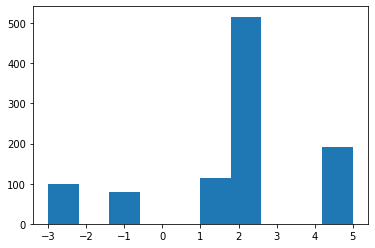

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = [-3, -1, 1, 2, 5]
pmf = [0.1, 0.1, 0.1, 0.5, 0.2] 
x_sample = np.random.choice(x, p=pmf, size=(1000,))

plt.hist(x_sample)
plt.show() 

#### Simulation of MDP
- src: 4, a: 2, dst: 0, r: -0.02, done: 0, info: prob 0.932
- src: 0, a: 1, dst: 1, r: -0.02, done: 0, info: prob 0.932
- src: 1, a: 1, dst: 2, r: -0.02, done: 0, info: prob 0.932
- src: 2, a: 1, dst: 3, r: -0.02, done: 1, info: prob 0.932
- final reward 1 obtained and win the game!
                        

### MDP Simulation

In [12]:
epoch = 3
np.random.seed(6) 
msg = "src: {:2}, a: {}, dst: {:2}, p: {:.1f}, r: {:5.2f}, done: {:1}, info: prob {:.3f}"
#msg = "src: {:2}, a: {}, dst: {:2}, r: {:5.2f}, done: {:1}, info: prob {:.3f}"
for _ in range(epoch):
    done = False
    src = np.random.choice([0,1,2,4,5,7,8,9,10])
    while not done:
        a = np.random.choice(actions, p=policy[src,:])
        prob = policy[src, a]
        dst = np.random.choice(states, p=P[src, a, :])
        p = P[src, a, dst]
        if (dst == 3):
            done = True
            msg_print = msg.format(src, a, dst, p, R[src, a], done, prob)
            print(msg_print)
            print("final reward 1 obtained and win the game!")
        elif (dst == 6):
            done = True
            msg_print = msg.format(src, a, dst, p, R[src, a], done, prob)
            print(msg_print)
            print("final reward -1 obtained and lose the game!")
        else:
            done = False
            msg_print = msg.format(src, a, dst, p, R[src, a], done, prob)
            print(msg_print)
            src = dst

src:  4, a: 2, dst:  0, p: 0.8, r: -0.02, done: 0, info: prob 0.932
src:  0, a: 1, dst:  4, p: 0.1, r: -0.02, done: 0, info: prob 0.932
src:  4, a: 2, dst:  0, p: 0.8, r: -0.02, done: 0, info: prob 0.932
src:  0, a: 1, dst:  1, p: 0.8, r: -0.02, done: 0, info: prob 0.932
src:  1, a: 1, dst:  2, p: 0.8, r: -0.02, done: 0, info: prob 0.932
src:  2, a: 1, dst:  3, p: 0.8, r: -0.02, done: 1, info: prob 0.932
final reward 1 obtained and win the game!
src:  2, a: 1, dst:  5, p: 0.1, r: -0.02, done: 0, info: prob 0.932
src:  5, a: 2, dst:  2, p: 0.8, r: -0.02, done: 0, info: prob 0.932
src:  2, a: 1, dst:  3, p: 0.8, r: -0.02, done: 1, info: prob 0.932
final reward 1 obtained and win the game!
src:  7, a: 2, dst:  7, p: 0.1, r: -0.02, done: 0, info: prob 0.932
src:  7, a: 2, dst:  4, p: 0.8, r: -0.02, done: 0, info: prob 0.932
src:  4, a: 2, dst:  0, p: 0.8, r: -0.02, done: 0, info: prob 0.932
src:  0, a: 2, dst:  0, p: 0.9, r: -0.02, done: 0, info: prob 0.023
src:  0, a: 1, dst:  1, p: 0.8, 

### Success rate of optimal policy

In [13]:
epoch = 1000
simulation_history = [] 
for _ in range(epoch):
    done = False
    src = np.random.choice([0,1,2,4,5,7,8,9,10])
    while not done:
        a = np.random.choice(actions, p=policy[src,:])
        dst = np.random.choice(states, p=P[src, a, :])
        if (dst == 3):
            done = True
            simulation_history.append(1.)
        elif (dst == 6):
            done = True
            simulation_history.append(0.)
        else:
            src = dst

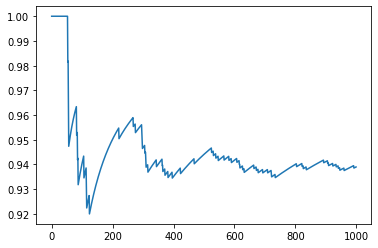

Success rate: 0.9390


In [14]:
history = np.cumsum(simulation_history) / (np.arange(epoch)+1)

plt.plot(history)
plt.show()

print("Success rate: {:.4f}".format(history[-1])) 